In [51]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
# Definindo a paleta de cores personalizada
colors = ["#FFFF00", "#00FF00", "#0000FF"]  # Amarelo, Verde, Azul
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

In [53]:
# Carregando o dataset
file_path = 'The_Cancer_data_1500_V2.csv'
df = pd.read_csv(file_path)

In [54]:
# Exibindo informações básicas do dataset
print(df.head())
print(df.info())
print(df.describe())

   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI             

In [55]:
# Função para criar histogramas
def plot_histograms(df, columns, n_rows, n_cols):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 10))
    axs = axs.flatten()
    for i, col in enumerate(columns):
        axs[i].hist(df[col], bins=30, color='blue', alpha=0.7)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()

In [56]:
# Colunas numéricas
numeric_columns = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

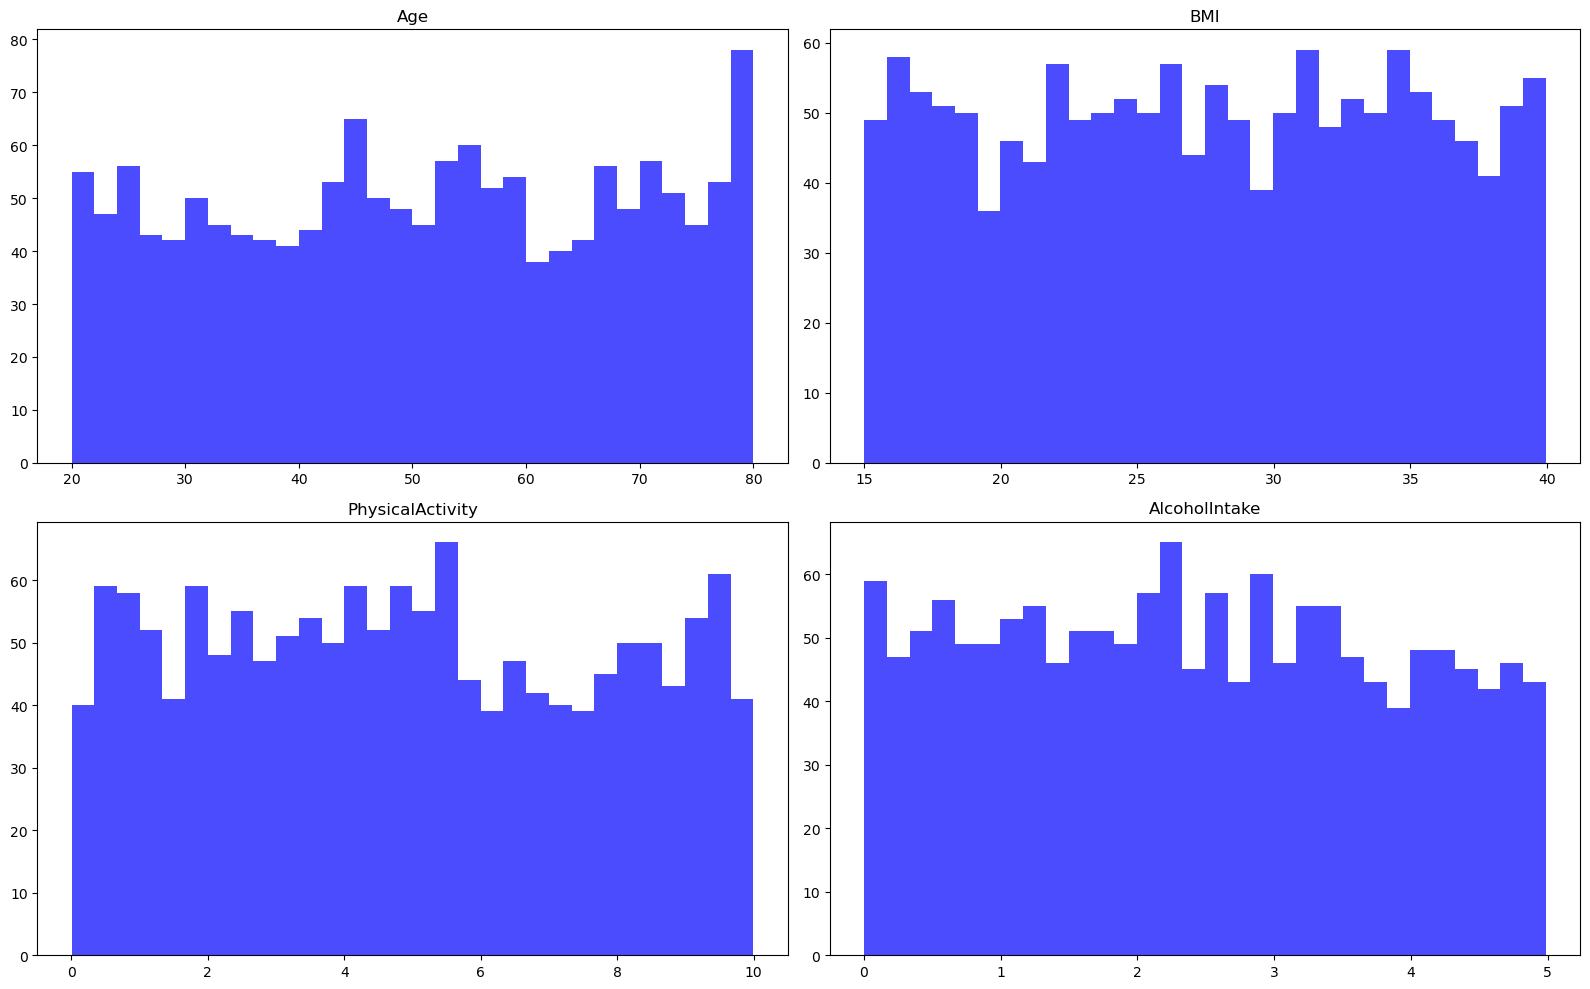

In [57]:
# Criando histogramas
plot_histograms(df, numeric_columns, n_rows=2, n_cols=2)

In [58]:
#COLUNAS
#Age: Idade do paciente.
#Gender: Gênero do paciente (0: feminino, 1: masculino).
#BMI: Índice de Massa Corporal (IMC).
#Smoking: Hábito de fumar (0: não fuma, 1: fuma).
#GeneticRisk: Risco genético (0, 1 ou 2).
#PhysicalActivity: Nível de atividade física.
#AlcoholIntake: Consumo de álcool.
#CancerHistory: Histórico de câncer na família (0: não, 1: sim).
#Diagnosis: Diagnóstico de câncer (0: não, 1: sim)

In [59]:
# Preparando os dados
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


In [60]:
# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Avaliando o modelo
y_pred = model.predict(X_test)

In [63]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       184
           1       0.94      0.88      0.91       116

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



In [64]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[177   7]
 [ 14 102]]


In [65]:
# Importância das features
feature_importances = model.feature_importances_
features = X.columns

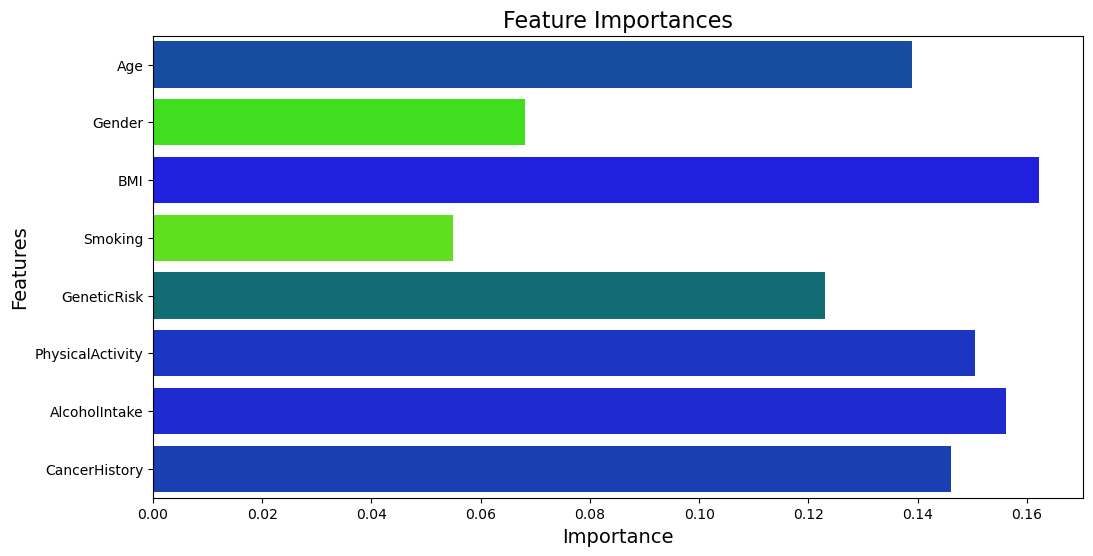

In [66]:
# Plotando a importância das features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, palette=cmap(feature_importances / max(feature_importances)))
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

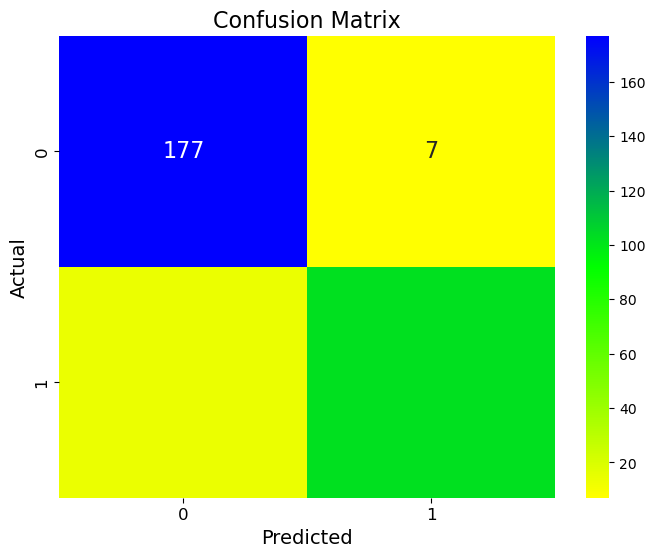

In [67]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 16}, cbar=True)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [68]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

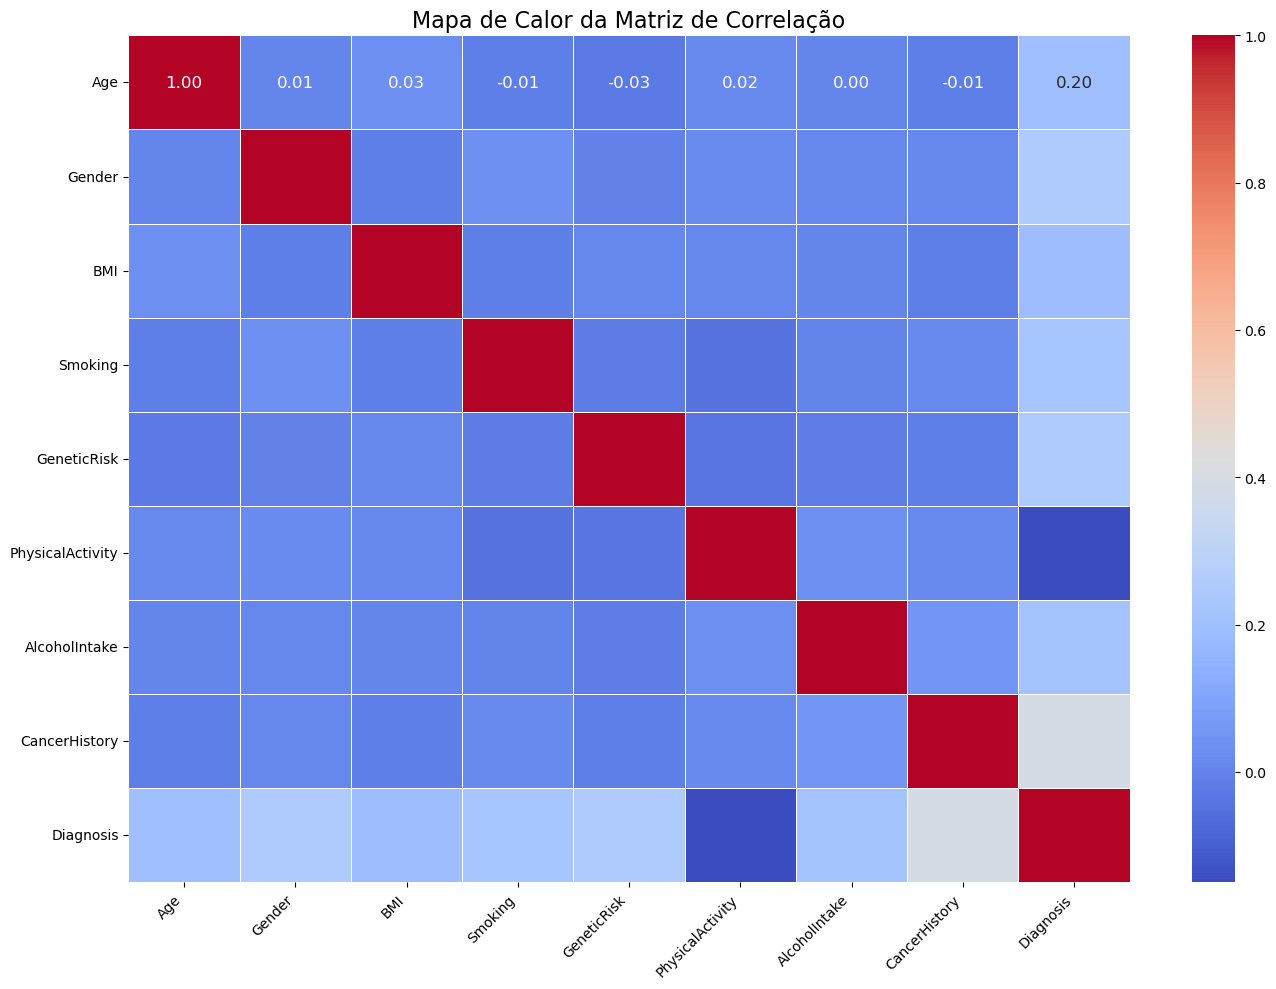

In [69]:
# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 12})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()


In [70]:
# Calculando a correlação entre cada fator e a variável 'Diagnosis'
correlation_matrix = df.corr()
cancer_correlation = correlation_matrix['Diagnosis'].drop('Diagnosis')

In [71]:
# Criando um DataFrame para melhor visualização
cancer_correlation_df = cancer_correlation.reset_index().rename(columns={'index': 'Feature', 'Diagnosis': 'Correlation'})


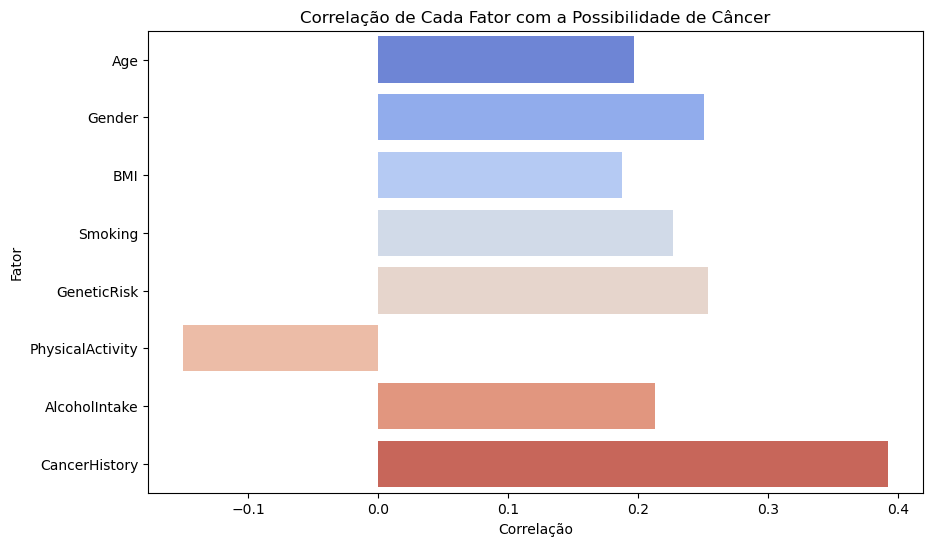

In [72]:
# Plotando o gráfico de correlação
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=cancer_correlation_df, palette='coolwarm')
plt.title('Correlação de Cada Fator com a Possibilidade de Câncer')
plt.xlabel('Correlação')
plt.ylabel('Fator')
plt.show()

In [73]:
# Calculando a proporção de diagnósticos de câncer por gênero
gender_cancer_proportion = df.groupby('Gender')['Diagnosis'].mean().reset_index()
gender_cancer_proportion['Gender'] = gender_cancer_proportion['Gender'].map({0: 'Female', 1: 'Male'})

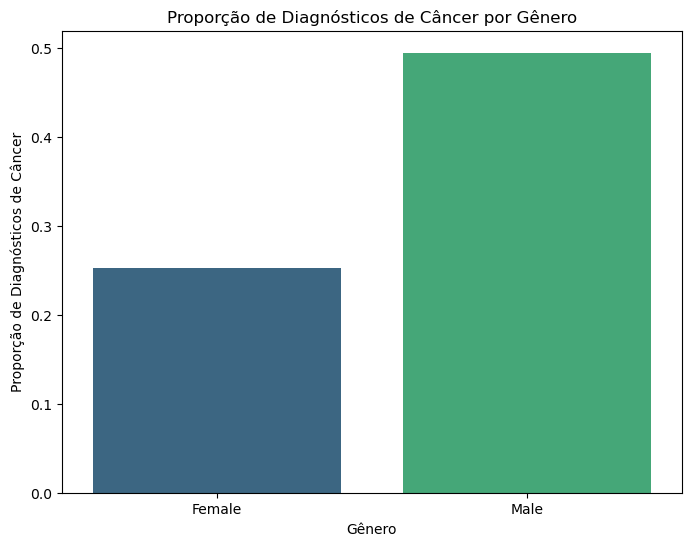

In [74]:
# Plotando o gráfico de proporção de diagnósticos de câncer por gênero
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Diagnosis', data=gender_cancer_proportion, palette='viridis')
plt.title('Proporção de Diagnósticos de Câncer por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção de Diagnósticos de Câncer')
plt.show()

In [75]:
# Exibindo a tabela de proporções
gender_cancer_proportion

,Gender,Diagnosis
0,Female,0.252618
1,Male,0.494565
